In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


In [3]:
df = pd.read_excel('/Users/Itua/Documents/resi_data_exercise.xlsx') 

In [4]:
df.head()

registration_date             first_called_at  \
0   2019-10-01 06:37:08.71828  2019-10-01 11:28:22.801625   
1   2019-10-01 08:09:43.27417  2019-10-01 09:19:10.083772   
2   2019-10-01 08:59:56.56947  2019-10-01 09:39:37.626189   
3  2019-10-01 10:31:54.630468  2019-10-01 10:38:51.134821   
4  2019-10-01 20:04:25.491265                         NaN   

   reg-firstcall(days) first_long_presale_called_at  reg-presalecall(days)  \
0             0.202246                          NaN                    NaN   
1             0.048227   2019-10-08 10:29:48.971749               7.097288   
2             0.027559                          NaN                    NaN   
3             0.004821                          NaN                    NaN   
4                  NaN                          NaN                    NaN   

              first_quoted_at  reg-quote(days) first_payment_date  \
0                         NaN              NaN                NaN   
1  2019-10-08 14:15:40.855926         7.254139                NaN   
2                         NaN              NaN                NaN   
3                         NaN              NaN                NaN   
4                         NaN              NaN                NaN   

   total_time_length(days) registered_with_phone_number postcode_area  \
0                      NaN                            t            LU   
1                      NaN                            t             N   
2                      NaN                            t            OX   
3                      NaN                            t            SS   
4                      NaN                            t            AL   

           geo estimated_property_value marketing_channel  referring_domain  \
0        other             2) 200 - 399   Lead Generators               NaN   
1       london             3) 400 - 599  GA - Prospecting    www.google.com   
2       tier_2               1) 0 - 200   Lead Generators               NaN   
3        other               1) 0 - 200   Lead Generators               NaN   
4  london_belt             3) 400 - 599  GA - Prospecting  www.google.co.uk   

         browser        os device_type  conversion  
0            NaN       NaN         NaN           0  
1         Chrome  Mac OS X     Desktop           0  
2            NaN       NaN         NaN           0  
3            NaN       NaN         NaN           0  
4  Mobile Safari       iOS      Tablet           0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3332 entries, 0 to 3331
Data columns (total 19 columns):
registration_date               3332 non-null object
first_called_at                 2796 non-null object
reg-firstcall(days)             2796 non-null float64
first_long_presale_called_at    690 non-null object
reg-presalecall(days)           690 non-null float64
first_quoted_at                 658 non-null object
reg-quote(days)                 658 non-null float64
first_payment_date              122 non-null object
total_time_length(days)         122 non-null float64
registered_with_phone_number    3332 non-null object
postcode_area                   3257 non-null object
geo                             3257 non-null object
estimated_property_value        3257 non-null object
marketing_channel               3332 non-null object
referring_domain                1460 non-null object
browser                         1713 non-null object
os                              1713 non-null o

In [7]:
profile = df.profile_report(title='Resi Data')
profile.to_file(output_file="ResiData2.html")

In [42]:
con_df=df[df['conversion']== 1]
con_df.conversion.value_counts()

1    122
Name: conversion, dtype: int64

In [9]:
con_df.head()

registration_date             first_called_at  \
8    2019-10-02 11:37:22.770496  2019-10-04 12:33:18.445875   
73   2019-10-12 07:10:22.445093  2019-10-15 15:20:31.525274   
121  2019-10-18 23:48:43.588631  2019-10-20 11:25:21.150952   
135   2019-10-21 11:19:07.22353   2019-10-21 11:26:02.72034   
154  2019-10-23 20:28:24.603281  2019-10-24 12:02:26.372621   

     reg-firstcall(days) first_long_presale_called_at  reg-presalecall(days)  \
8               2.038839   2019-10-04 12:33:18.445875               2.038839   
73              3.340383   2019-10-15 15:20:31.525274               3.340383   
121             1.483768     2019-10-21 10:46:56.2047               2.457090   
135             0.004809    2019-11-26 11:37:02.47085              36.012445   
154             0.648632                          NaN                    NaN   

                first_quoted_at  reg-quote(days)          first_payment_date  \
8    2019-10-04 12:58:27.341041         2.056303  2019-10-29 14:28:47.764081   
73   2019-10-15 16:02:57.911397         3.369855  2019-11-06 17:24:11.742762   
121  2019-10-25 12:47:19.030484         6.540688  2019-11-24 23:32:52.307526   
135  2019-11-26 11:50:14.748572        36.021615  2019-11-28 13:19:12.562204   
154  2019-10-28 15:50:34.411917         4.807058  2019-12-10 11:32:40.125565   

     total_time_length(days) registered_with_phone_number postcode_area  \
8                  27.119039                            t            TW   
73                 25.426265                            t            CR   
121                36.988990                            t            SW   
135                38.083395                            t            TW   
154                47.627957                            t            HA   

        geo estimated_property_value marketing_channel  referring_domain  \
8    london             4) 600 - 799   SEO - Non-Brand    www.google.com   
73   london             3) 400 - 599   Lead Generators  www.google.co.uk   
121  london             3) 400 - 599  GA - Prospecting     www.google.de   
135  london             3) 400 - 599            Direct               NaN   
154  london             3) 400 - 599       SEO - Brand    www.google.com   

           browser         os device_type  conversion  
8           Chrome  Windows 7     Desktop           1  
73   Mobile Safari        iOS      Mobile           1  
121          Opera  Windows 8     Desktop           1  
135        Firefox     Ubuntu     Desktop           1  
154         Chrome  Windows 7     Desktop           1

## EDA

In [10]:
con_df.marketing_channel.unique()

array(['SEO - Non-Brand', 'Lead Generators', 'GA - Prospecting', 'Direct',
       'SEO - Brand', 'Content Marketing', 'Unknown', 'Admin', 'Referral',
       'Houzz', 'Exhibition', 'FB - Prospecting', 'FB - Organic',
       'Partnership', 'Google'], dtype=object)

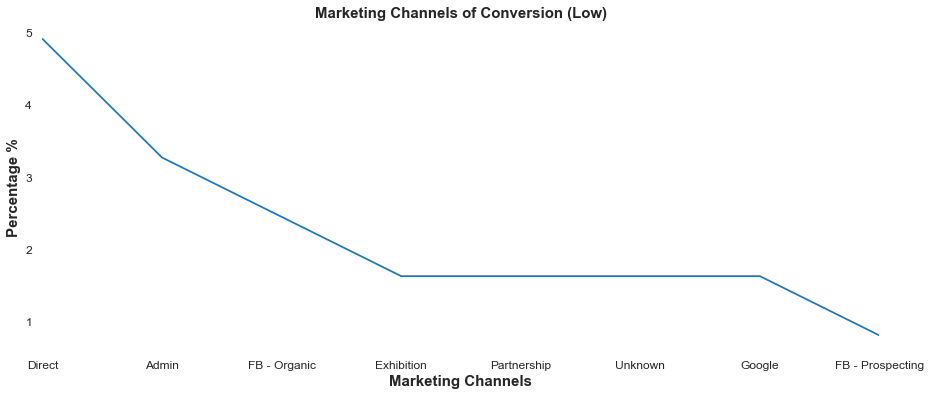

In [11]:
plt.figure(figsize=(15, 6))
(con_df.marketing_channel.value_counts(normalize=True)*100).sort_values(ascending=False)[7:].plot()
plt.xlabel("Marketing Channels",weight ='bold', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Percentage %",weight ='bold', fontsize=15)
plt.title("Marketing Channels of Conversion (Low)", weight ='bold', fontsize=15)
plt.show()

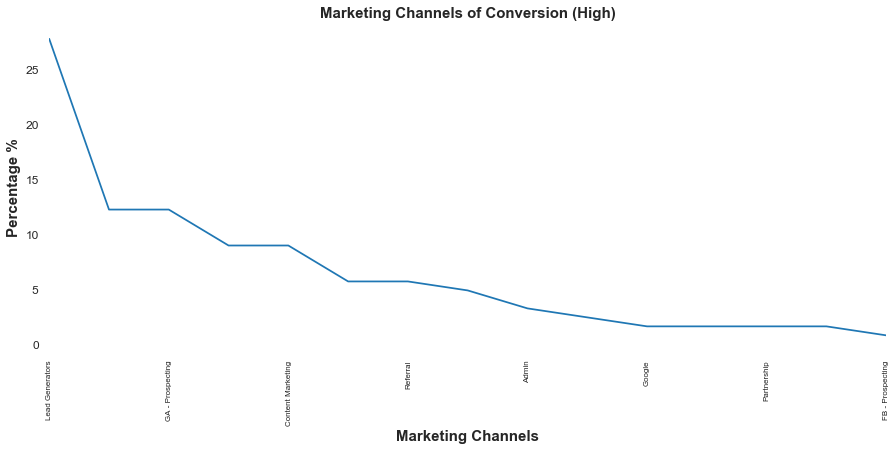

In [12]:
plt.figure(figsize=(15, 6))
(con_df.marketing_channel.value_counts(normalize=True)*100).head(15).plot()
plt.xlabel("Marketing Channels",weight ='bold', fontsize=15)
plt.xticks(fontsize=8, rotation='vertical')
plt.yticks(fontsize=12)
plt.ylabel("Percentage %",weight ='bold', fontsize=15)
plt.title("Marketing Channels of Conversion (High)", weight ='bold', fontsize=15)
plt.show()

In [13]:
con_df.geo.value_counts(normalize=True)*100

london         66.942149
london_belt    19.008264
other           9.917355
tier_2          4.132231
Name: geo, dtype: float64

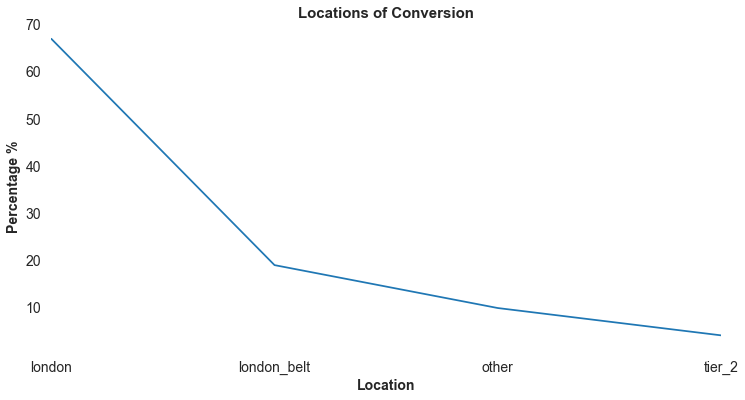

In [14]:
plt.figure(figsize=(12, 6))
(con_df.geo.value_counts(normalize=True)*100).plot()
plt.xlabel("Location",weight ='bold', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Percentage %",weight ='bold', fontsize=14)
plt.title("Locations of Conversion", weight ='bold', fontsize=15)
plt.show()

In [43]:
con_df.estimated_property_value.unique()

array(['4) 600 - 799', '3) 400 - 599', '5) 800 - 999', '6) 1000+',
       '2) 200 - 399', '1) 0 - 200', 'SE'], dtype=object)

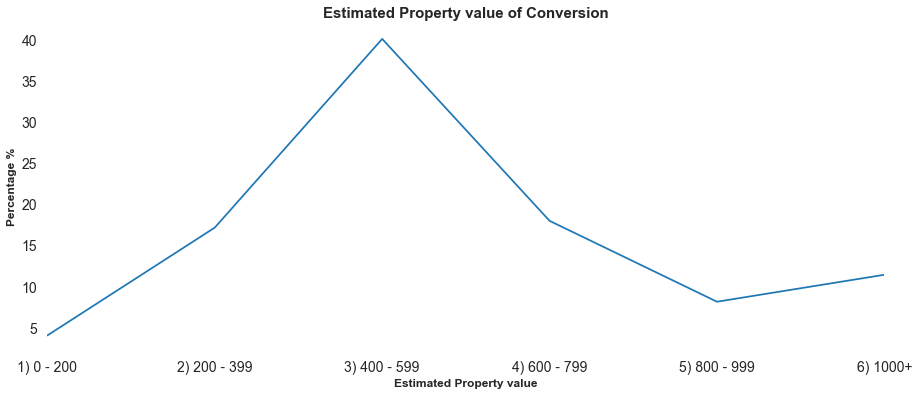

In [44]:
value = [ '1) 0 - 200', '2) 200 - 399', '3) 400 - 599', '4) 600 - 799', '5) 800 - 999', '6) 1000+']
plt.figure(figsize=(15, 6))
(con_df.estimated_property_value.value_counts(normalize=True)*100).reindex(value).plot()
plt.xlabel("Estimated Property value",weight ='bold', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Percentage %",weight ='bold', fontsize=12)
plt.title("Estimated Property value of Conversion", weight ='bold', fontsize=15)
plt.show()

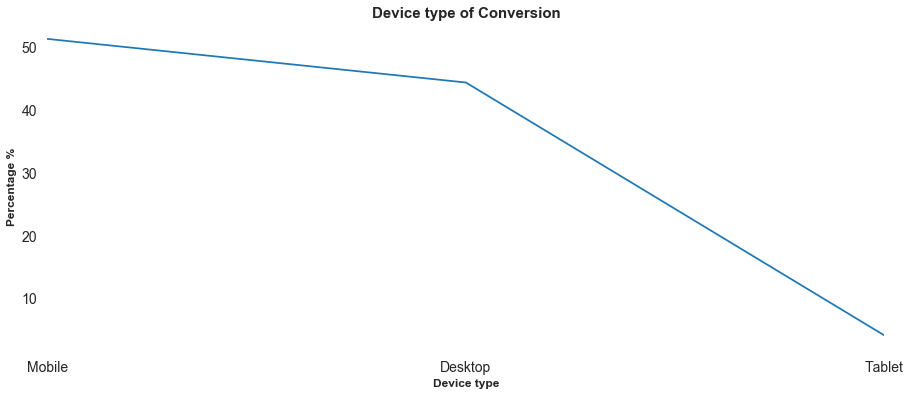

In [45]:
plt.figure(figsize=(15, 6))
(con_df.device_type.value_counts(normalize=True)*100).plot()
plt.xlabel("Device type",weight ='bold', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Percentage %",weight ='bold', fontsize=12)
plt.title("Device type of Conversion", weight ='bold', fontsize=15)
plt.show()

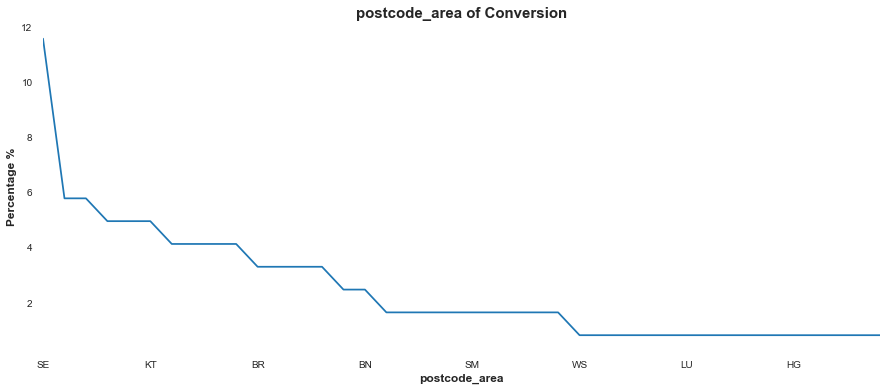

In [20]:
plt.figure(figsize=(15, 6))
(con_df.postcode_area.value_counts(normalize=True)*100).plot()
plt.xlabel("postcode_area",weight ='bold', fontsize=12)
plt.ylabel("Percentage %",weight ='bold', fontsize=12)
plt.title("postcode_area of Conversion", weight ='bold', fontsize=15)
plt.show()

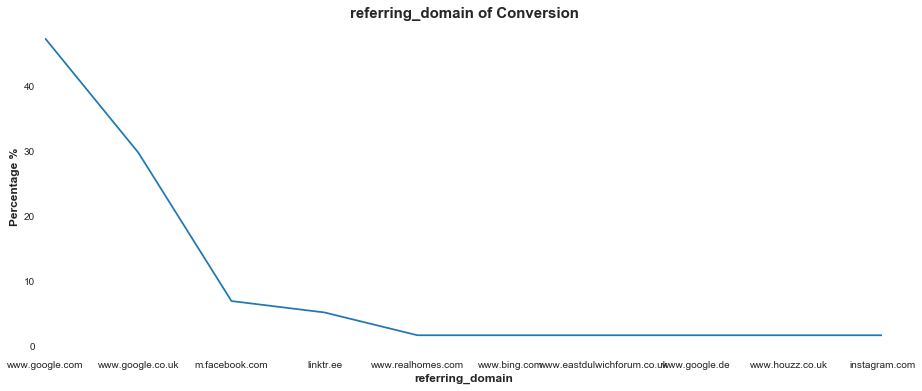

In [21]:
plt.figure(figsize=(15, 6))
(con_df.referring_domain.value_counts(normalize=True)*100).plot()
plt.xlabel("referring_domain",weight ='bold', fontsize=12)
plt.ylabel("Percentage %",weight ='bold', fontsize=12)
plt.title("referring_domain of Conversion", weight ='bold', fontsize=15)
plt.show()

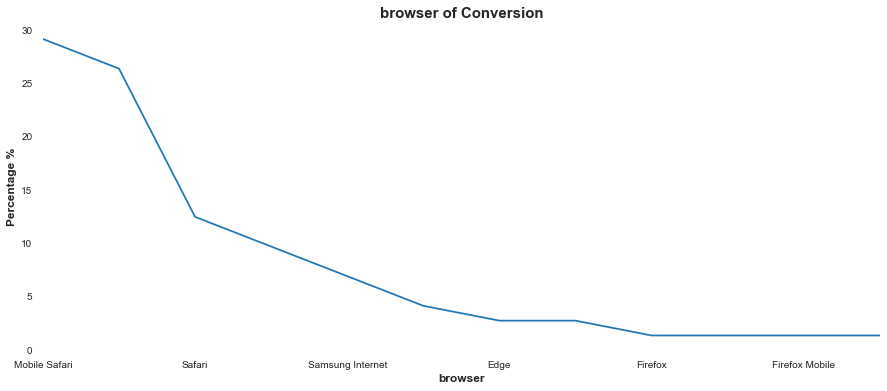

In [22]:
plt.figure(figsize=(15, 6))
(con_df.browser.value_counts(normalize=True)*100).plot()
plt.xlabel("browser",weight ='bold', fontsize=12)
plt.ylabel("Percentage %",weight ='bold', fontsize=12)
plt.title("browser of Conversion", weight ='bold', fontsize=15)
plt.show()

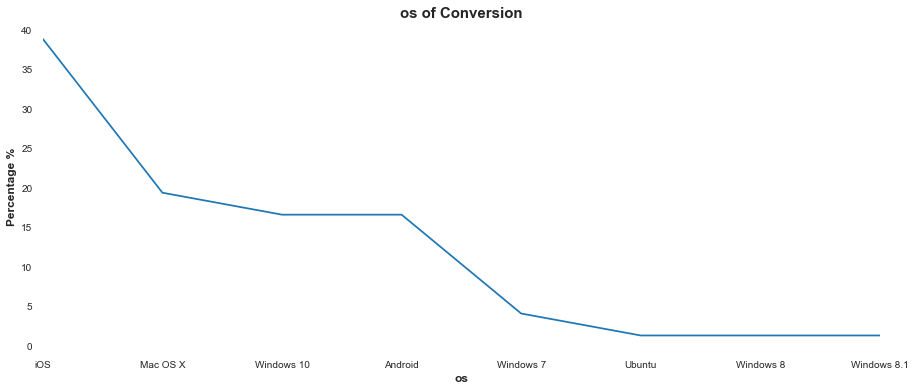

In [23]:
plt.figure(figsize=(15, 6))
(con_df.os.value_counts(normalize=True)*100).plot()
plt.xlabel("os",weight ='bold', fontsize=12)
plt.ylabel("Percentage %",weight ='bold', fontsize=12)
plt.title("os of Conversion", weight ='bold', fontsize=15)
plt.show()

Text(0, 0.5, 'Frequency')

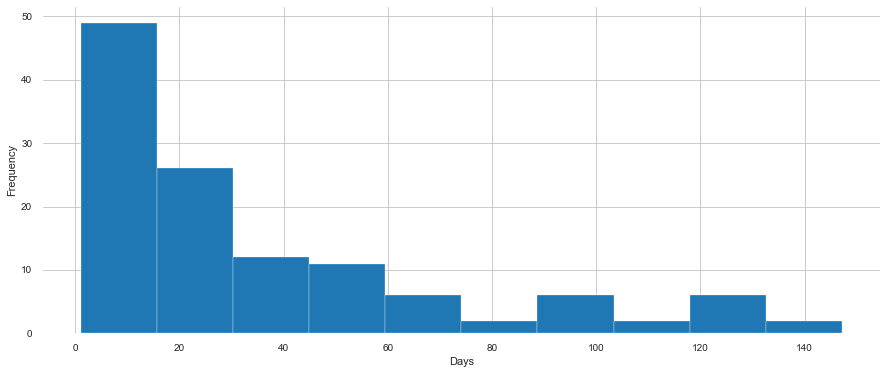

In [24]:
con_df['total_time_length(days)'].hist(figsize=(15,6))
plt.xlabel('Days')
plt.ylabel('Frequency')


In [25]:
con_df['estimated_property_value'].unique()

array(['4) 600 - 799', '3) 400 - 599', '5) 800 - 999', '6) 1000+',
       '2) 200 - 399', '1) 0 - 200', nan], dtype=object)

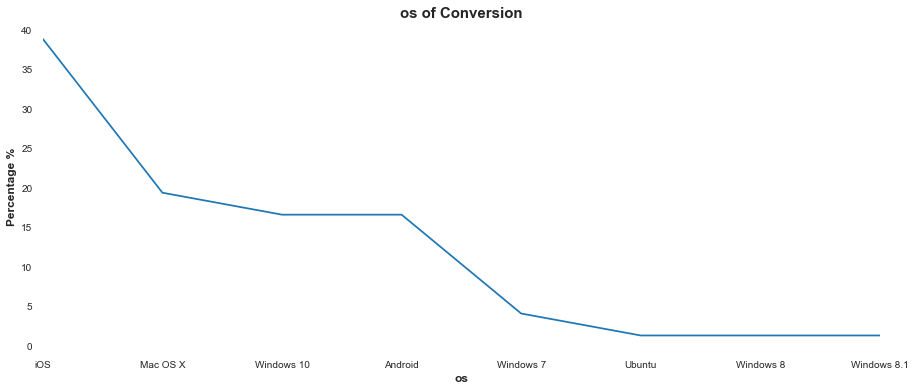

In [26]:
plt.figure(figsize=(15, 6))
(con_df.os.value_counts(normalize=True)*100).plot()
plt.xlabel("os",weight ='bold', fontsize=12)
plt.ylabel("Percentage %",weight ='bold', fontsize=12)
plt.title("os of Conversion", weight ='bold', fontsize=15)
plt.show()

In [29]:
con_df.groupby('estimated_property_value')['total_time_length(days)'].agg('mean')

estimated_property_value
1) 0 - 200      27.924577
2) 200 - 399    28.602877
3) 400 - 599    40.027510
4) 600 - 799    32.533754
5) 800 - 999    24.157126
6) 1000+        41.434236
Name: total_time_length(days), dtype: float64

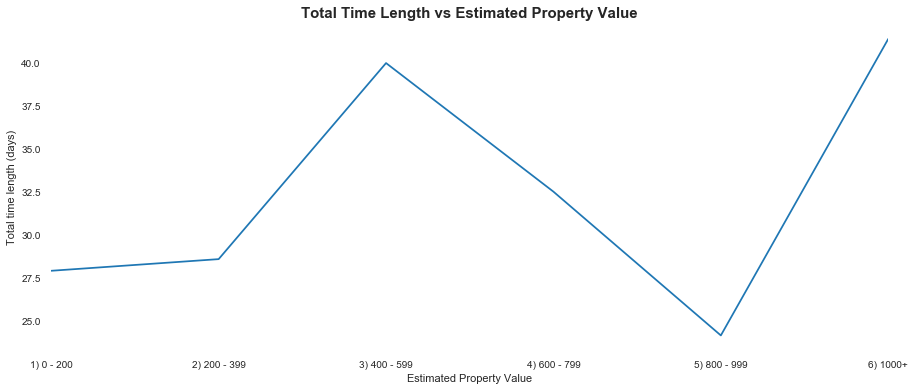

In [30]:
avg_day = con_df.groupby('estimated_property_value')['total_time_length(days)'].agg('mean')
avg_day.plot(figsize=(15,6))
plt.xlabel('Estimated Property Value')
plt.ylabel('Total time length (days)')
plt.title('Total Time Length vs Estimated Property Value', weight= 'bold', fontsize =15)
plt.show()

In [31]:
con_df.groupby('estimated_property_value')['total_time_length(days)'].agg('mean')

estimated_property_value
1) 0 - 200      27.924577
2) 200 - 399    28.602877
3) 400 - 599    40.027510
4) 600 - 799    32.533754
5) 800 - 999    24.157126
6) 1000+        41.434236
Name: total_time_length(days), dtype: float64

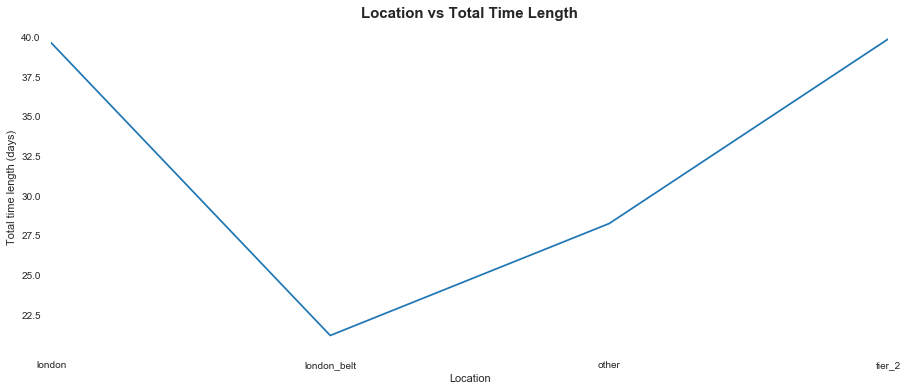

In [32]:
avg_day = con_df.groupby('geo')['total_time_length(days)'].agg('mean')
avg_day.plot(figsize=(15,6))
plt.xlabel('Location')
plt.ylabel('Total time length (days)')
plt.title('Location vs Total Time Length', weight= 'bold', fontsize =15)
plt.show()

In [33]:
con_df.groupby('geo')['total_time_length(days)'].agg('mean')


geo
london         39.657831
london_belt    21.214628
other          28.273014
tier_2         39.905500
Name: total_time_length(days), dtype: float64

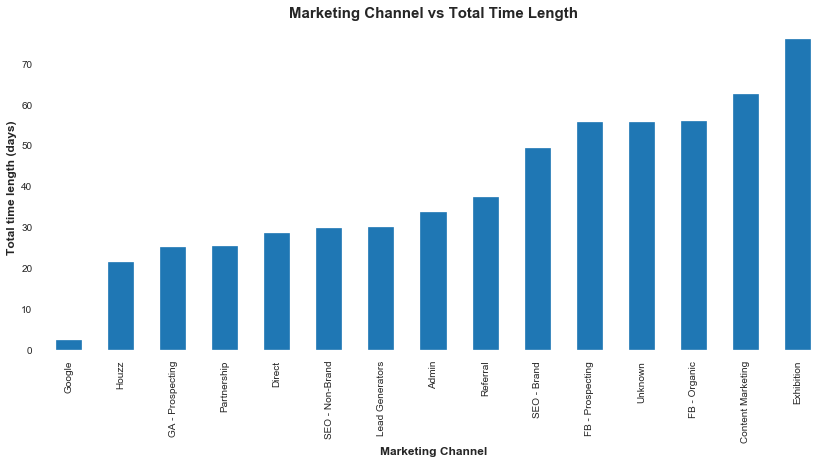

In [34]:
avg_day = con_df.groupby('marketing_channel')['total_time_length(days)'].agg('mean').sort_values(ascending=True)
avg_day.plot(figsize=(14,6), kind='bar')
plt.xlabel('Marketing Channel',weight= 'bold',fontsize=12)
plt.ylabel('Total time length (days)',weight= 'bold', fontsize=12)
plt.title('Marketing Channel vs Total Time Length', weight= 'bold', fontsize =15)
plt.show()

In [35]:
con_df.groupby('marketing_channel')['total_time_length(days)'].agg('mean').sort_values(ascending=True)


marketing_channel
Google                2.522829
Houzz                21.583913
GA - Prospecting     25.273475
Partnership          25.321125
Direct               28.540490
SEO - Non-Brand      29.889146
Lead Generators      30.026730
Admin                33.780671
Referral             37.504738
SEO - Brand          49.514311
FB - Prospecting     55.744168
Unknown              55.811662
FB - Organic         56.049509
Content Marketing    62.534542
Exhibition           75.972036
Name: total_time_length(days), dtype: float64

In [36]:
con_df.marketing_channel.value_counts()

Lead Generators      34
SEO - Non-Brand      15
GA - Prospecting     15
SEO - Brand          11
Content Marketing    11
Houzz                 7
Referral              7
Direct                6
Admin                 4
FB - Organic          3
Google                2
Unknown               2
Partnership           2
Exhibition            2
FB - Prospecting      1
Name: marketing_channel, dtype: int64

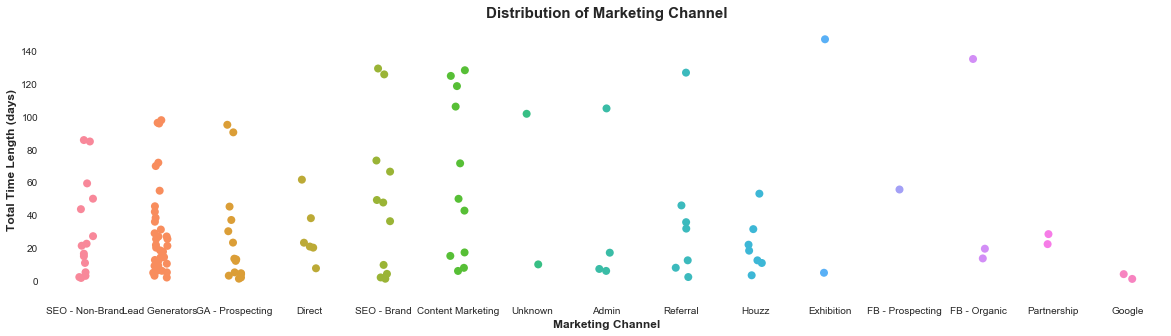

In [37]:
plt.figure(figsize=(20,5))
ax = sns.stripplot(x="marketing_channel", y="total_time_length(days)", data=con_df, size=8)
plt.xlabel("Marketing Channel", weight ='bold', fontsize=12)
plt.ylabel("Total Time Length (days)",weight ='bold', fontsize=12)
plt.title("Distribution of Marketing Channel", weight ='bold', fontsize=15)
plt.show()

In [38]:
df.isnull().sum()

registration_date                  0
first_called_at                  536
reg-firstcall(days)              536
first_long_presale_called_at    2642
reg-presalecall(days)           2642
first_quoted_at                 2674
reg-quote(days)                 2674
first_payment_date              3210
total_time_length(days)         3210
registered_with_phone_number       0
postcode_area                     75
geo                               75
estimated_property_value          75
marketing_channel                  0
referring_domain                1872
browser                         1619
os                              1619
device_type                     1619
conversion                         0
dtype: int64

## Data Cleaning

In [6]:
df.postcode_area.fillna(df.postcode_area.mode()[0], inplace=True)


In [7]:
df.geo.fillna(df.geo.mode()[0],inplace=True)

In [8]:
df.estimated_property_value.fillna(df.postcode_area.mode()[0], inplace=True)

In [9]:
df.isnull().sum()

registration_date                  0
first_called_at                  536
reg-firstcall(days)              536
first_long_presale_called_at    2642
reg-presalecall(days)           2642
first_quoted_at                 2674
reg-quote(days)                 2674
first_payment_date              3210
total_time_length(days)         3210
registered_with_phone_number       0
postcode_area                      0
geo                                0
estimated_property_value           0
marketing_channel                  0
referring_domain                1872
browser                         1619
os                              1619
device_type                     1619
conversion                         0
dtype: int64

In [10]:
df.conversion.value_counts()

0    3210
1     122
Name: conversion, dtype: int64

## Upsample minority class

In [11]:
df_majority = df[df.conversion==0]
df_minority = df[df.conversion==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=3210,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.conversion.value_counts()

1    3210
0    3210
Name: conversion, dtype: int64

In [12]:
X = df.loc[:, ['registered_with_phone_number', 'postcode_area', 'geo', 'estimated_property_value','marketing_channel']]
y = df.loc[:, 'conversion']

data = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2, random_state = 42)

## Decision Tree

In [15]:
# Create the classifier, fit it on the training data and make predictions on the test set
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [66]:
# Create DOT data
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=data.columns,  
                           class_names=np.unique(y).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# Draw graph
graph = graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())



In [16]:
y_preds = clf.predict(X_test)  

In [17]:
# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))


AUC is :0.53


In [32]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

C:\Users\Itua\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
y_preds_forest = forest.predict(X_test)  

In [34]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [6, 8, 10, 12, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [6, 8, 10, 12, 14, 16]
}

In [18]:
def run_GridSearchCV(X_train, X_test, y_train, y_test, model, param_grid, scoring="accuracy", cv = 5, verbose=1):
    opt_model = GridSearchCV(model, param_grid = param_grid, scoring = scoring, cv = cv, n_jobs = -1, return_train_score = True)
    print("Running GridSearchCV...")
    opt_model.fit(X_train, y_train)
    best_model = opt_model.best_estimator_
    print("Done.")
    print("---------------------------------------------------------------------")
    print("Best Parameters:", opt_model.best_params_)
    evaluate(best_model, X_train, X_test, y_train, y_test)
    cv_results = pd.DataFrame(opt_model.cv_results_)
    columns = ["rank_test_score", "params", "mean_train_score","std_train_score", "mean_test_score", "std_test_score"]
    cv_results_top10 = cv_results[columns].sort_values("rank_test_score").head(10)
    return cv_results_top10, best_model

In [29]:
def evaluate(estimator, X_train, X_test, y_train, y_test): 
    y_test_pred = estimator.predict(X_test)
    probas = estimator.predict_proba(X_test)
    print("---------------------------------------------------------------------")
    print("AUC: ", round(roc_auc_score(y_test, y_test_pred), 4))
    print("---------------------------------------------------------------------")
    plt.show();

In [20]:
DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced",max_depth = None)
adaboost_clf = AdaBoostClassifier(base_estimator = DTC)
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42)
# Instantiate an GradientBoostingClassifier
gbt_clf = GradientBoostingClassifier(random_state=42)

In [21]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }

In [22]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [ 0.05, 0.075, 0.1, 0.15, 0.2],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "n_estimators":[10]
    }

## Decision Tree using GridSearchCV

In [30]:
run_GridSearchCV(X_train, X_test, y_train, y_test, clf, dt_param_grid, scoring="roc_auc", cv = 5, verbose=1)

Running GridSearchCV...
Done.
---------------------------------------------------------------------
Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 10}
---------------------------------------------------------------------
AUC:  0.5509
---------------------------------------------------------------------


(    rank_test_score                                             params  \
 20                1  {'criterion': 'gini', 'max_depth': 8, 'min_sam...   
 19                2  {'criterion': 'gini', 'max_depth': 8, 'min_sam...   
 0                 3  {'criterion': 'gini', 'max_depth': 6, 'min_sam...   
 18                4  {'criterion': 'gini', 'max_depth': 8, 'min_sam...   
 38                5  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
 2                 6  {'criterion': 'gini', 'max_depth': 6, 'min_sam...   
 1                 7  {'criterion': 'gini', 'max_depth': 6, 'min_sam...   
 37                8  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
 36                9  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
 90               10  {'criterion': 'entropy', 'max_depth': 6, 'min_...   
 
     mean_train_score  std_train_score  mean_test_score  std_test_score  
 20          0.811660         0.017473         0.662232        0.066655  
 19          0.812138    

## Random Forest using GridSearchCV

In [36]:
run_GridSearchCV(X_train, X_test, y_train, y_test, forest, dt_param_grid, scoring="roc_auc", cv = 5, verbose=1)

Running GridSearchCV...
Done.
---------------------------------------------------------------------
Best Parameters: {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 16, 'min_samples_split': 10}
---------------------------------------------------------------------
AUC:  0.5
---------------------------------------------------------------------


(     rank_test_score                                             params  \
 161                1  {'criterion': 'entropy', 'max_depth': 12, 'min...   
 61                 2  {'criterion': 'gini', 'max_depth': 12, 'min_sa...   
 45                 3  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
 80                 4  {'criterion': 'gini', 'max_depth': 15, 'min_sa...   
 81                 5  {'criterion': 'gini', 'max_depth': 15, 'min_sa...   
 169                6  {'criterion': 'entropy', 'max_depth': 15, 'min...   
 83                 7  {'criterion': 'gini', 'max_depth': 15, 'min_sa...   
 82                 8  {'criterion': 'gini', 'max_depth': 15, 'min_sa...   
 66                 9  {'criterion': 'gini', 'max_depth': 12, 'min_sa...   
 153               10  {'criterion': 'entropy', 'max_depth': 12, 'min...   
 
      mean_train_score  std_train_score  mean_test_score  std_test_score  
 161          0.785831         0.017108         0.733219        0.052371  
 61         

## Adaboost using GridSearchCV

In [37]:
run_GridSearchCV(X_train, X_test, y_train, y_test, adaboost_clf, param_grid, scoring="roc_auc", cv = 5, verbose=1)

Running GridSearchCV...
Done.
---------------------------------------------------------------------
Best Parameters: {'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'random', 'n_estimators': 2}
---------------------------------------------------------------------
AUC:  0.5799
---------------------------------------------------------------------


(   rank_test_score                                             params  \
 7                1  {'base_estimator__criterion': 'entropy', 'base...   
 3                2  {'base_estimator__criterion': 'gini', 'base_es...   
 5                3  {'base_estimator__criterion': 'entropy', 'base...   
 1                4  {'base_estimator__criterion': 'gini', 'base_es...   
 2                5  {'base_estimator__criterion': 'gini', 'base_es...   
 0                6  {'base_estimator__criterion': 'gini', 'base_es...   
 4                7  {'base_estimator__criterion': 'entropy', 'base...   
 6                8  {'base_estimator__criterion': 'entropy', 'base...   
 
    mean_train_score  std_train_score  mean_test_score  std_test_score  
 7          0.991122         0.000993         0.588364        0.039449  
 3          0.991122         0.000993         0.581757        0.052749  
 5          0.991122         0.000993         0.581368        0.049780  
 1          0.991122         0.000993   

## Gradient Boosting with GrindSearchCV

In [38]:
run_GridSearchCV(X_train, X_test, y_train, y_test, gbt_clf, parameters, scoring="roc_auc", cv = 5, verbose=1)

Running GridSearchCV...
Done.
---------------------------------------------------------------------
Best Parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.075, 'loss': 'deviance', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 10}
---------------------------------------------------------------------
AUC:  0.5
---------------------------------------------------------------------


(    rank_test_score                                             params  \
 6                 1  {'criterion': 'friedman_mse', 'learning_rate':...   
 8                 2  {'criterion': 'friedman_mse', 'learning_rate':...   
 0                 3  {'criterion': 'friedman_mse', 'learning_rate':...   
 19                4  {'criterion': 'friedman_mse', 'learning_rate':...   
 12                5  {'criterion': 'friedman_mse', 'learning_rate':...   
 2                 6  {'criterion': 'friedman_mse', 'learning_rate':...   
 7                 7  {'criterion': 'friedman_mse', 'learning_rate':...   
 14                8  {'criterion': 'friedman_mse', 'learning_rate':...   
 13                9  {'criterion': 'friedman_mse', 'learning_rate':...   
 25               10  {'criterion': 'friedman_mse', 'learning_rate':...   
 
     mean_train_score  std_train_score  mean_test_score  std_test_score  
 6           0.799228         0.006518         0.724906        0.045477  
 8           0.855875    

In [46]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_leaf=2,min_samples_split=10)

clf.fit(X_train, y_train)

# Create DOT data
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=data.columns,  
                           class_names=np.unique(y).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# Draw graph
graph = graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"15,8!"')
pydot_graph.write_png('tree.png')

True

In [60]:
df['registration_date'] = pd.to_datetime(df['registration_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3332 entries, 0 to 3331
Data columns (total 19 columns):
registration_date               3332 non-null datetime64[ns]
first_called_at                 2796 non-null object
reg-firstcall(days)             2796 non-null float64
first_long_presale_called_at    690 non-null object
reg-presalecall(days)           690 non-null float64
first_quoted_at                 658 non-null object
reg-quote(days)                 658 non-null float64
first_payment_date              122 non-null object
total_time_length(days)         122 non-null float64
registered_with_phone_number    3332 non-null object
postcode_area                   3332 non-null object
geo                             3332 non-null object
estimated_property_value        3332 non-null object
marketing_channel               3332 non-null object
referring_domain                1460 non-null object
browser                         1713 non-null object
os                              1713 no

In [55]:
con_df['day_of_week'] = df['registration_date'].dt.weekday_name

In [61]:
con_df['day_of_week'].value_counts(normalize=True)

Monday       0.213115
Wednesday    0.188525
Tuesday      0.180328
Friday       0.131148
Thursday     0.122951
Sunday       0.090164
Saturday     0.073770
Name: day_of_week, dtype: float64

Text(0, 0.5, 'Percentage')

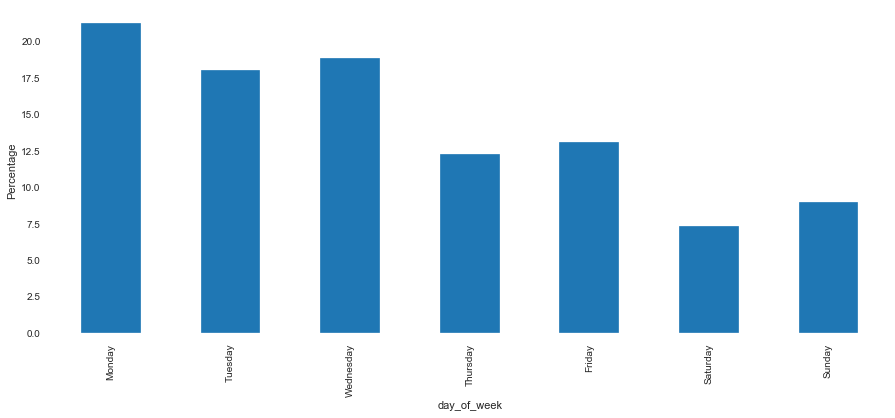

In [102]:
plt.figure(figsize=(15,6))
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_weekday = df.groupby(['day_of_week']).sum().reindex(days) 
week1=df_weekday.apply(lambda x: x/x.sum()*100)
week1.conversion.plot(kind='bar')
plt.ylabel('Percentage')

In [119]:
one_day=con_df[con_df['reg-firstcall(days)']< 1]
one_day['reg-firstcall(days)'].describe()

count    87.000000
mean      0.176315
std       0.263525
min       0.000000
25%       0.004912
50%       0.013415
75%       0.343942
max       0.874706
Name: reg-firstcall(days), dtype: float64

## Calculating conversion rate vs time length(registration to first call)

In [123]:
def con_rate(con_df,df ):
    subscribers = con_df[con_df['conversion'] == 1]\
    ['registration_date'].count()
    total = df['registration_date'].count()
    conv_rate = subscribers/total
    print(round(conv_rate*100, 2),
    '%')

In [124]:
con_rate(one_day, df)



2.61 %


In [122]:
one_three_day=con_df[(con_df['reg-firstcall(days)']>= 1) & (con_df['reg-firstcall(days)']<3)]
one_three_day['reg-firstcall(days)'].describe()

count    25.000000
mean      1.853019
std       0.578088
min       1.019671
25%       1.452000
50%       1.827721
75%       2.108713
max       2.917801
Name: reg-firstcall(days), dtype: float64

In [125]:
con_rate(one_three_day, df)

0.75 %


In [126]:
three_five_day=con_df[(con_df['reg-firstcall(days)']>= 3) & (con_df['reg-firstcall(days)']<5)]
three_five_day['reg-firstcall(days)'].describe()

count    4.000000
mean     3.904914
std      0.776132
min      3.249428
25%      3.317644
50%      3.729358
75%      4.316627
max      4.911511
Name: reg-firstcall(days), dtype: float64

In [127]:
con_rate(three_five_day, df)

0.12 %


In [130]:
conversion_table = [['Up to 1 Day', 2.61], ['1-3 Days', 0.75], ['3-5 Days', 0.12]] 
con_table = pd.DataFrame(conversion_table, columns = ['Number of Days', 'Conversion Rate'])
con_table.head()

Number of Days  Conversion Rate
0    Up to 1 Day             2.61
1       1-3 Days             0.75
2       3-5 Days             0.12

Text(0, 0.5, 'Conversion Rate')

<Figure size 1080x576 with 0 Axes>

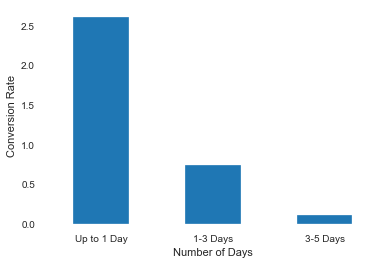

In [144]:
plt.figure(figsize=(15,8))
con_table.plot(x='Number of Days',y='Conversion Rate', kind='bar',legend=False)
plt.xticks(rotation='horizontal')
plt.ylabel('Conversion Rate')


In [242]:
a=df.marketing_channel.value_counts()
a

Lead Generators      1469
SEO - Non-Brand       678
GA - Prospecting      507
Content Marketing     153
Direct                144
SEO - Brand            76
Houzz                  73
Exhibition             45
FB - Prospecting       44
Unknown                44
GA - Brand             23
SEO                    22
Admin                  18
Referral               11
Google                 11
FB - Organic            9
Partnership             4
Word of Mouth           1
Name: marketing_channel, dtype: int64

In [243]:
b=con_df.marketing_channel.value_counts()
b

Lead Generators      34
GA - Prospecting     15
SEO - Non-Brand      15
Content Marketing    11
SEO - Brand          11
Referral              7
Houzz                 7
Direct                6
Admin                 4
FB - Organic          3
Exhibition            2
Google                2
Partnership           2
Unknown               2
FB - Prospecting      1
Name: marketing_channel, dtype: int64

In [236]:
mar_con=pd.DataFrame(b/a*100)

In [239]:
mar_con.dropna(inplace=True)

In [240]:
mar_con.sort_values(by='marketing_channel')

marketing_channel
SEO - Non-Brand             2.212389
FB - Prospecting            2.272727
Lead Generators             2.314500
GA - Prospecting            2.958580
Direct                      4.166667
Exhibition                  4.444444
Unknown                     4.545455
Content Marketing           7.189542
Houzz                       9.589041
SEO - Brand                14.473684
Google                     18.181818
Admin                      22.222222
FB - Organic               33.333333
Partnership                50.000000
Referral                   63.636364

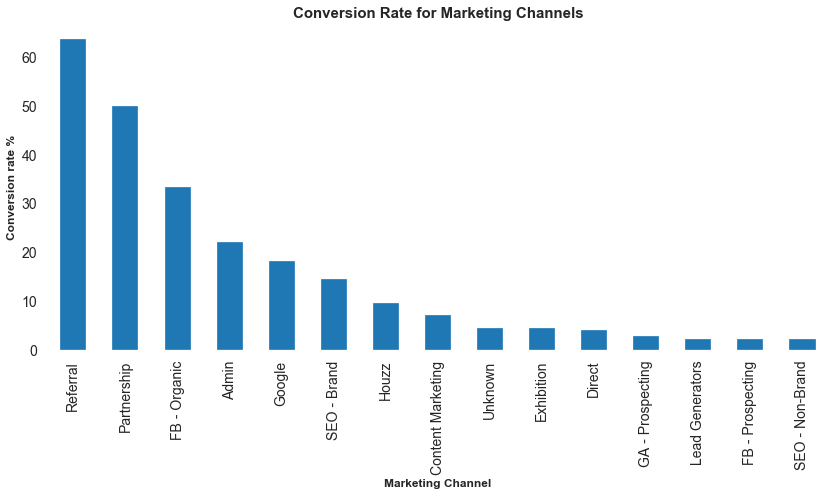

In [241]:
mar_con.sort_values(by='marketing_channel', ascending=False).plot(kind='bar',legend=False,figsize=(14,6))
plt.xlabel("Marketing Channel",weight ='bold', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Conversion rate %",weight ='bold', fontsize=12)
plt.title("Conversion Rate for Marketing Channels", weight ='bold', fontsize=15)
plt.show()